# Minimize Errors

In [1]:
## import statements
# These lines load the tests. 
from gofer.ok import check
import numpy as np
from datascience import *
import pandas as pd
import matplotlib
from matplotlib import patches
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', FutureWarning)
plt.style.use('ggplot')
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
# Fix for datascience collections Iterable
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

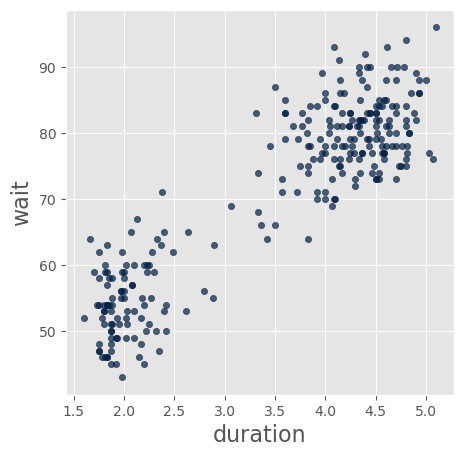

In [2]:
faithful = Table.read_table("../Lab08/faithful-new.csv")
faithful.scatter('duration','wait')

In [10]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))
# Regression
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))
def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

In [11]:
correlation(faithful,"duration","wait")

0.90081116832181318

Slope: 10.73 Intercept:  33.47


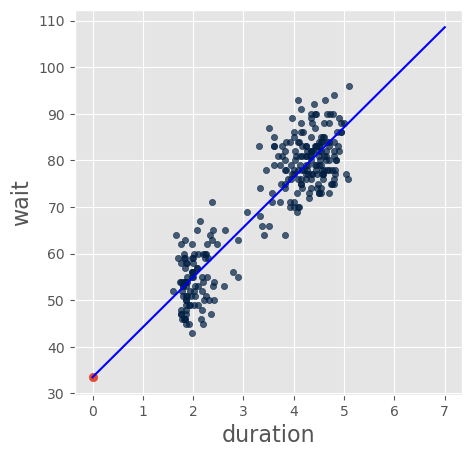

In [12]:
faithful.scatter('duration','wait')
slp = slope(faithful, 'duration','wait')
inter = intercept(faithful,'duration','wait')
print("Slope: %4.2f Intercept:  %4.2f" % (slp, inter))
plt.scatter(0,inter)
xs, ys = zip([0, inter], [7, slp*7+inter])
plt.plot(xs,ys, color='blue')
plt.savefig('faithful_regress.png')
plt.show()

In [13]:
def mse_c(any_slope,any_intercept):
    tbl = faithful
    xlabel = 'duration'
    ylabel = 'wait'
    xdata, ydata = tbl.column(xlabel), tbl.column(ylabel)
    fitted = any_slope * xdata + any_intercept
    mse = np.mean((ydata - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)
    return mse

In [14]:
mse_c(5,5)

Root mean squared error: 49.2495660766


2425.5197587316175

In [16]:
mse_c(10.73,33.47)

Root mean squared error: 5.89222749007


34.718344794770218

In [18]:
m_slope, m_intercept = minimize(mse_c)

Root mean squared error: 72.1840478548
Root mean squared error: 72.1840478548
Root mean squared error: 68.5682096254
Root mean squared error: 62.7307717633
Root mean squared error: 11.9478107824
Root mean squared error: 100.356271475
Root mean squared error: 39.8913254231
Root mean squared error: 26.3828312828
Root mean squared error: 11.9690000063
Root mean squared error: 11.9690000063
Root mean squared error: 11.9478107824
Root mean squared error: 11.7173199537
Root mean squared error: 11.5198061527
Root mean squared error: 11.503683385
Root mean squared error: 11.5458456541
Root mean squared error: 11.5098443997
Root mean squared error: 11.5060370726
Root mean squared error: 11.503728655
Root mean squared error: 11.503728655
Root mean squared error: 78.0006323527
Root mean squared error: 11.503683385
Root mean squared error: 12.9734163017
Root mean squared error: 11.452276831
Root mean squared error: 11.0870845443
Root mean squared error: 11.1488354543
Root mean squared error: 11.14

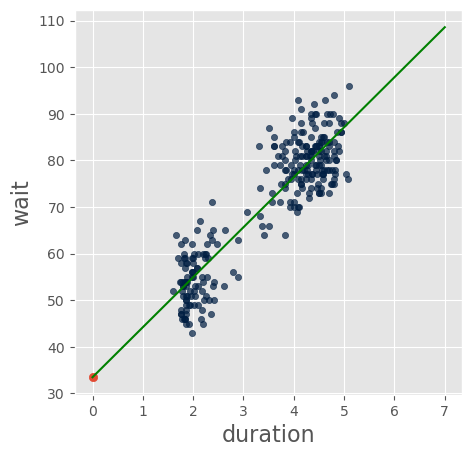

In [20]:
faithful.scatter('duration','wait')
plt.scatter(0,m_intercept)
xs, ys = zip([0, m_intercept], [7, m_slope*7+m_intercept])
plt.plot(xs,ys, color='green')
plt.savefig('faithful_regress_mse.png')
plt.show()